In [2]:
#import of the libraries and read file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
happiness = pd.read_csv('C:/Users/79269/Desktop/Python/Kaggle/Датасет world happiness report/world-happiness-report.csv')

In [3]:
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268



Columns meaning:

Ladder score - means if you have bigger score you can have better possibilities in life, than someone whose have less score

Log GDP per capita - means Gross Domestic Product (GDP) per capita (per person)

Social support - means that person has a family, friends and other people, who can make a support for them in difficult life situation

Healthy life expectancy at birth - years of healthy life which newborn can expect to have

Freedom to make life choices - means that people can choose job, family, friends, goverment and place to live on his own choice

Generosity - means the quality of kindness and generous

Perceptions of corruption - means degree of corruption in the country




In [4]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
happiness.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

There are not many null values in the columns, therefore we can ill null values with mean values of this columns. Data types are ok, we don't need to convert data type of 'year' column to date_time.


In [6]:
columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for col in happiness[columns]:
    happiness[col] = happiness[col].fillna(happiness[col].mean())


Create a column with total score of happiness:

In [7]:
happiness["Total_score"]=(happiness["Life Ladder"]+happiness["Log GDP per capita"]+happiness["Social support"]+happiness["Healthy life expectancy at birth"]+happiness["Freedom to make life choices"]+happiness["Generosity"]+happiness["Positive affect"])- (happiness["Perceptions of corruption"]+happiness["Negative affect"])

In [8]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
 11  Total_score                       1949 non-null   float64
dtypes: flo

Data preprocessing is over. Time to start EDA!

In the EDA we can ask some questions:
- what the correlation between features
- explore the some features (ex. country)  depends on year
- explore the features depending on country
- explore the total score depending of country, show top- and bottom-10 countries

In [9]:
#correlation
happiness.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Total_score
year,1.000000,0.035515,0.077311,-0.010069,0.162174,0.220102,-0.041429,-0.079233,-0.003227,0.195926,0.141644
Life Ladder,0.035515,1.000000,0.783824,0.705356,0.741200,0.525844,0.186132,-0.419349,0.530459,-0.296786,0.823403
Log GDP per capita,0.077311,0.783824,1.000000,0.682438,0.834455,0.361404,-0.000901,-0.333645,0.297011,-0.204615,0.885613
Social support,-0.010069,0.705356,0.682438,1.000000,0.613854,0.408765,0.065510,-0.216028,0.430414,-0.395676,0.673561
Healthy life expectancy at birth,0.162174,0.741200,0.834455,0.613854,1.000000,0.382536,0.020276,-0.311815,0.313989,-0.135599,0.988382
Freedom to make life choices,0.220102,0.525844,0.361404,0.408765,0.382536,1.000000,0.319785,-0.476264,0.602743,-0.264397,0.445596
Generosity,-0.041429,0.186132,-0.000901,0.065510,0.020276,0.319785,1.000000,-0.278440,0.349683,-0.088906,0.069630
Perceptions of corruption,-0.079233,-0.419349,-0.333645,-0.216028,-0.311815,-0.476264,-0.278440,1.000000,-0.290161,0.257595,-0.370426
Positive affect,-0.003227,0.530459,0.297011,0.430414,0.313989,0.602743,0.349683,-0.290161,1.000000,-0.372901,0.381888
Negative affect,0.195926,-0.296786,-0.204615,-0.395676,-0.135599,-0.264397,-0.088906,0.257595,-0.372901,1.000000,-0.192973


From matrix correlation we can see that total score of happines has the higher depending on Healthy life expectancy at birth feature. Also the total score depends on Life Ladder and Log GDP per capita.

In [10]:
#depending country of total score
country_total = happiness.groupby('Country name')['Total_score'].mean().sort_values(ascending= False).head(10)
country_total

Country name
Singapore      95.388990
Switzerland    94.260000
Norway         93.547600
Iceland        93.314138
Canada         93.073170
Australia      93.026007
Luxembourg     92.971727
New Zealand    92.834143
Sweden         92.639465
Netherlands    92.372365
Name: Total_score, dtype: float64

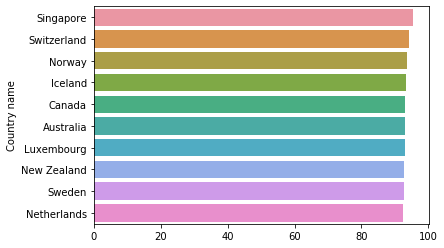

In [11]:
sns.set_palette('RdBu')
sns.barplot(country_total.values, country_total.index)
plt.show()

We can see the top 3 happinest country is Singapore, Switzerland and Norway.

Country name
Luxembourg              11.607091
Qatar                   11.507600
Singapore               11.329000
Switzerland             11.095400
Ireland                 11.064857
United Arab Emirates    11.059692
Norway                  11.039100
Kuwait                  10.974818
United States           10.956067
Austria                 10.886846
Name: Log GDP per capita, dtype: float64


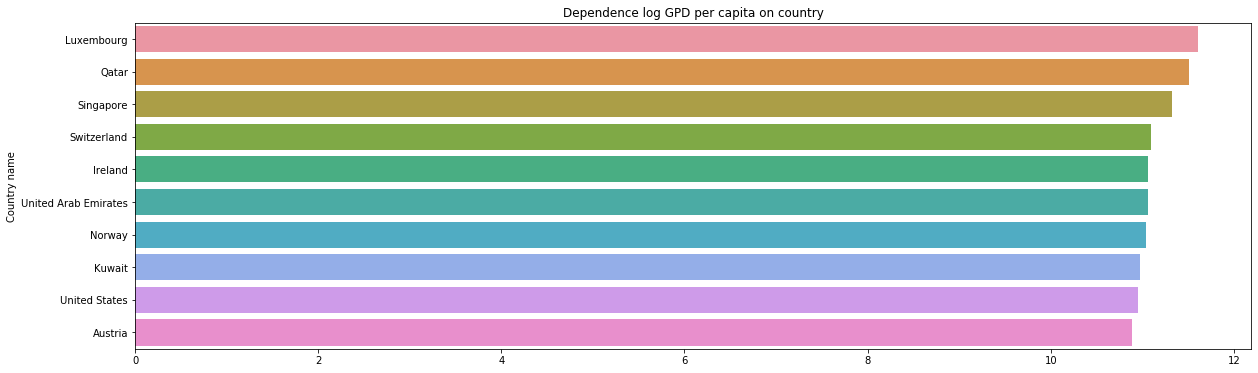

In [12]:
#let's see dependence of GPD per capita, Healthy life expectancy at birth and Social support on country(top 10)
gpd_country = happiness.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending= False).head(10)
print(gpd_country)

sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.barplot(gpd_country.values, gpd_country.index).set_title('Dependence log GPD per capita on country')
plt.show()

As shown on the barplot, the highest GPD in Luxembourg, Quatar and Singapore.

Country name
Singapore      75.358462
Japan          74.292000
Switzerland    73.334000
Spain          73.314667
Italy          72.974667
Cyprus         72.969231
Iceland        72.865000
France         72.789333
Canada         72.694667
Australia      72.692857
Name: Healthy life expectancy at birth, dtype: float64


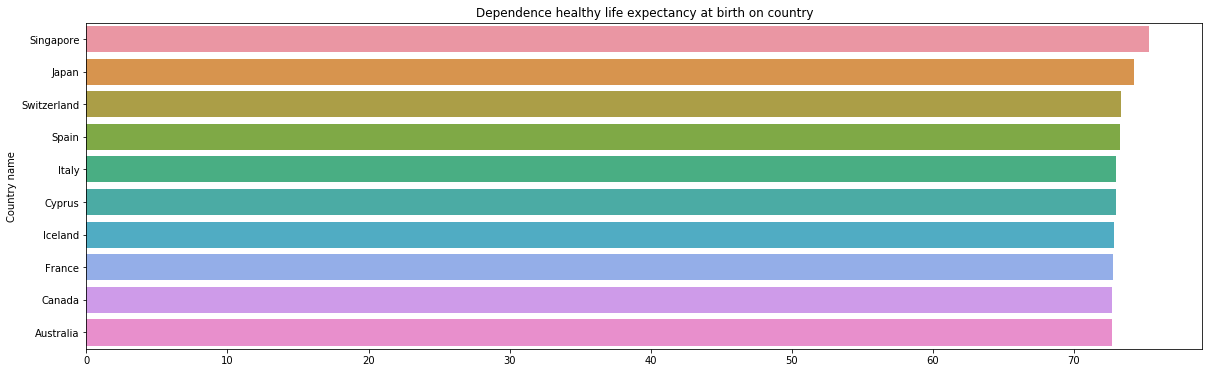

In [13]:
lifeexp_country = happiness.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(10)
print(lifeexp_country)

plt.figure(figsize=(20, 6))
sns.barplot(lifeexp_country.values, lifeexp_country.index).set_title('Dependence healthy life expectancy at birth on country')
plt.show()

As shown, Singapore have the the highest degree of Healthy life expectancy at birth

Country name
Iceland           0.977500
Cuba              0.970000
Ireland           0.960000
Denmark           0.957133
New Zealand       0.952929
Norway            0.950500
Finland           0.949000
Australia         0.947357
United Kingdom    0.945333
Switzerland       0.943600
Name: Social support, dtype: float64


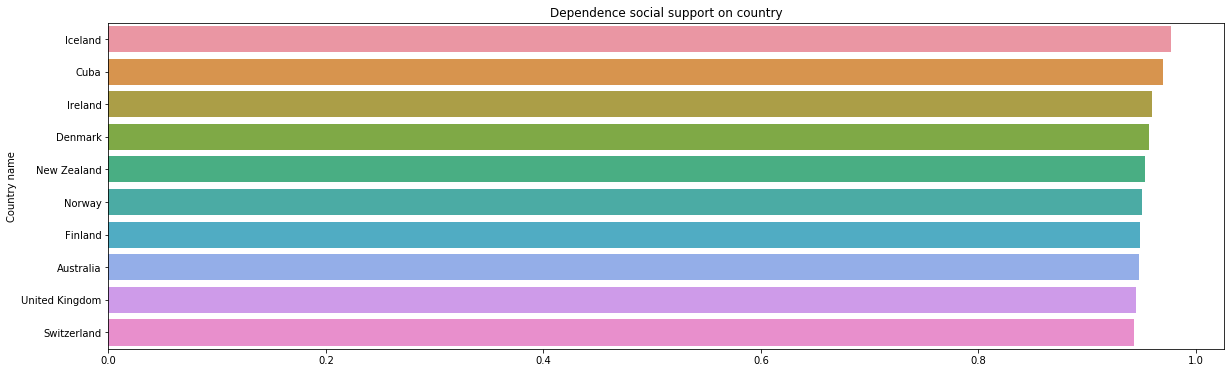

In [14]:
social_country = happiness.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)
print(social_country)

plt.figure(figsize=(20, 6))
sns.barplot(social_country.values, social_country.index).set_title('Dependence social support on country')
plt.show()

As shown on a barplot, the highest social support have people from Iceland, Cuba and Ireland. It can be explained that Iceland is s very small country and people there have a lot of social connection and Ireland is an island and not very inhabited. And Cuba people  on the contrary have a lot of family and friends connection as a feature of this peoples.

Country name
Mali                        62.440692
Ivory Coast                 62.351222
Nigeria                     62.132385
Swaziland                   62.045333
Burundi                     61.660400
Lesotho                     60.073500
Haiti                       59.356909
Sierra Leone                57.943750
Chad                        57.904143
Central African Republic    54.270000
Name: Total_score, dtype: float64


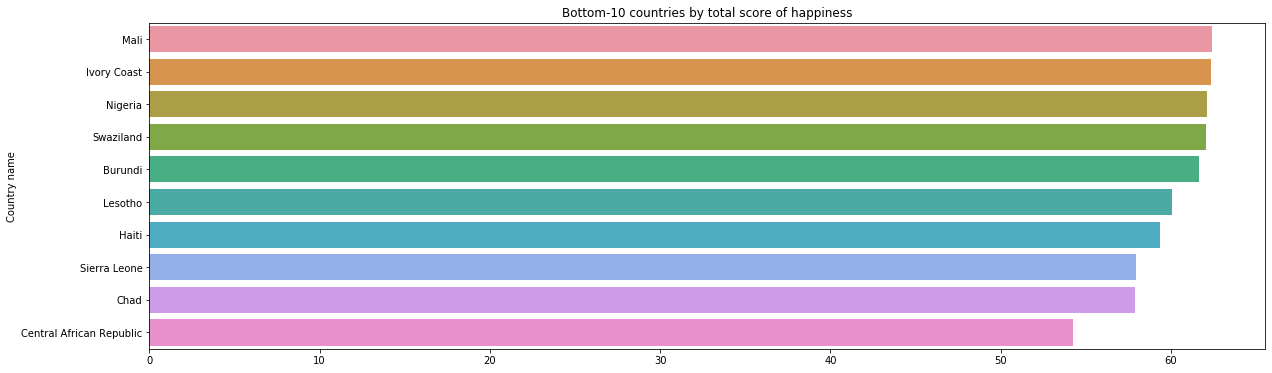

In [15]:
#also we need to see bottom-10 countries by total score of happiness
total_country_bad = happiness.groupby('Country name')['Total_score'].mean().sort_values(ascending=False).tail(10)
print(total_country_bad)

plt.figure(figsize=(20, 6))
sns.barplot(total_country_bad.values, total_country_bad.index).set_title('Bottom-10 countries by total score of happiness')
plt.show()

As expected, the worst countries for living is Central African Republic, Chad and Sierra leone. There are the wosrt living conditions, low quality od medicine, education possibilities and etc.

Than I think will be good to see dependences of Healthy life expectancy at birth ans social support on total score:

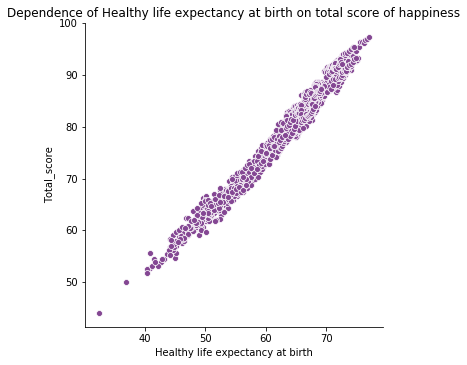

In [16]:
sns.relplot(x='Healthy life expectancy at birth', y='Total_score', data=happiness, kind='scatter').set(title='Dependence of Healthy life expectancy at birth on total score of happiness')
plt.show()

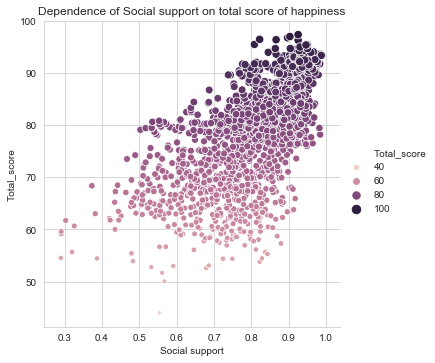

In [17]:
sns.set_style('whitegrid')
sns.relplot(x='Social support', y='Total_score', data=happiness, kind='scatter', size='Total_score', hue='Total_score').set(title='Dependence of Social support on total score of happiness')
plt.show()

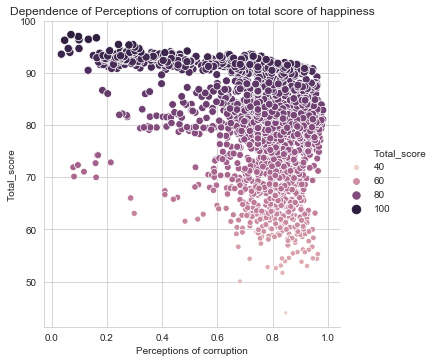

In [18]:
sns.set_style('whitegrid')
sns.relplot(x='Perceptions of corruption', y='Total_score', data=happiness, kind='scatter', size='Total_score', hue='Total_score').set(title='Dependence of Perceptions of corruption on total score of happiness')
plt.show()

Freedom to make life choices has a high correlation with positive affect:

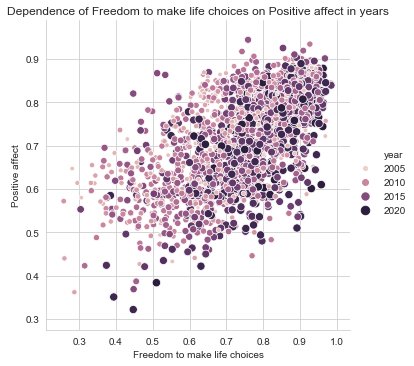

In [19]:
sns.set_style('whitegrid')
sns.relplot(x='Freedom to make life choices', y='Positive affect', data=happiness, kind='scatter', size='year', hue='year').set(title='Dependence of Freedom to make life choices on Positive affect in years')
plt.show()

Also I would like to determine the correlation of Perceptions of corruption and negative affect in years:

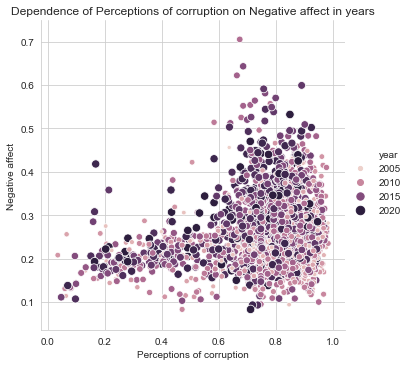

In [20]:
sns.set_style('whitegrid')
sns.relplot(x='Perceptions of corruption', y='Negative affect', data=happiness, kind='scatter', size='year', hue='year').set(title='Dependence of Perceptions of corruption on Negative affect in years')
plt.show()

Than, good practice will be show how have been changed Healthy life expectancy at birth in years, because

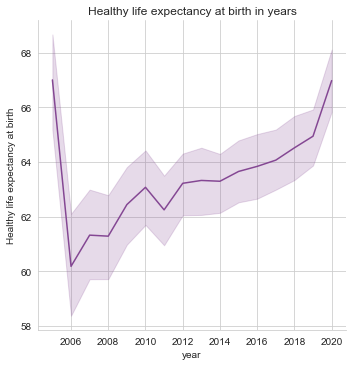

In [21]:
sns.set_style('whitegrid')
sns.relplot(x='year', y='Healthy life expectancy at birth', data=happiness, kind='line').set(title='Healthy life expectancy at birth in years')
plt.show()

As shown on the line plot, Healthy life expectancy at birth has a positive growing in years. It relate with science and technical progress in medicine.

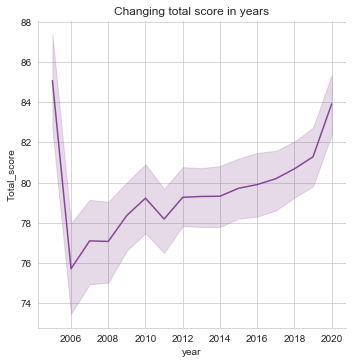

In [22]:
sns.relplot(x='year', y='Total_score', data=happiness, kind='line').set(title='Changing total score in years')
plt.show()

As expected, the correlation the same, because total score has the highest correlation with Healthy life expectancy at birth.

Than we can explore how had been changing Freedom to make life choices in years:

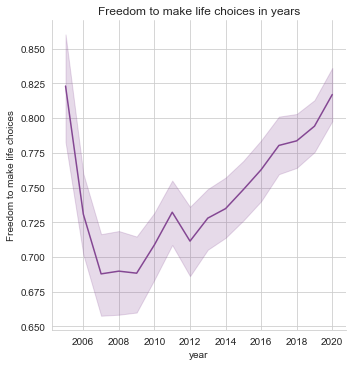

In [23]:
sns.relplot(x='year', y='Freedom to make life choices', data=happiness, kind='line').set(title='Freedom to make life choices in years')
plt.show()

We can notice, that Freedom to make life choices has been increased after 2012.

Than we can explore how had been changing Log GPD per capita choices in years:

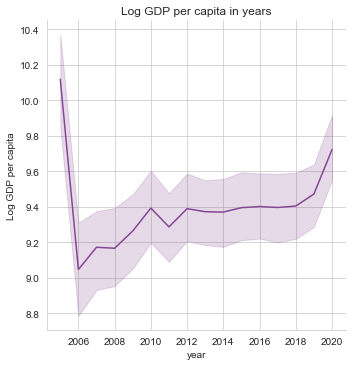

In [24]:
sns.relplot(x='year', y='Log GDP per capita', data=happiness, kind='line').set(title='Log GDP per capita in years')
plt.show()

We can define that log GDP per capita getting better since 2014 and now it has stable growth.

Now I would like to try to show Life Ladder, Healthy life expectancy at birth in years by swarmplot(), stripplot() and violinplot(), showed earlier

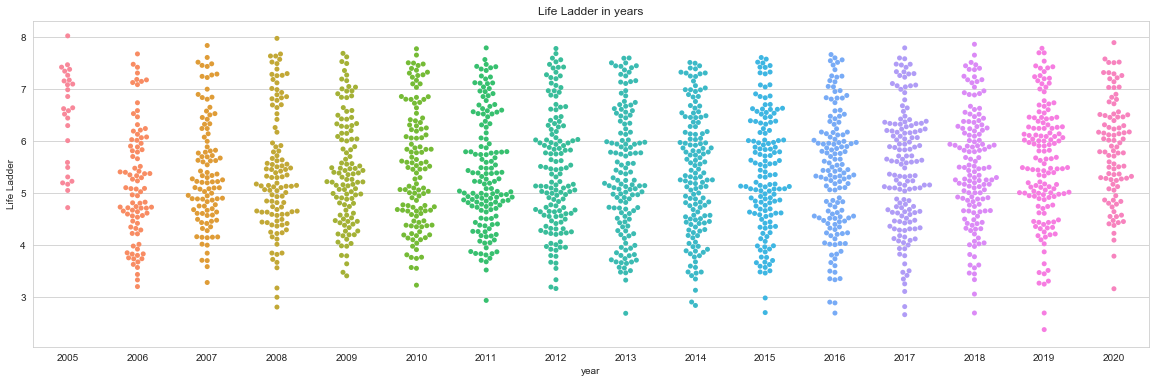

In [25]:
#Life Ladder
plt.figure(figsize=(20, 6))
sns.swarmplot(x='year', y='Life Ladder', data=happiness).set(title='Life Ladder in years')
plt.show()

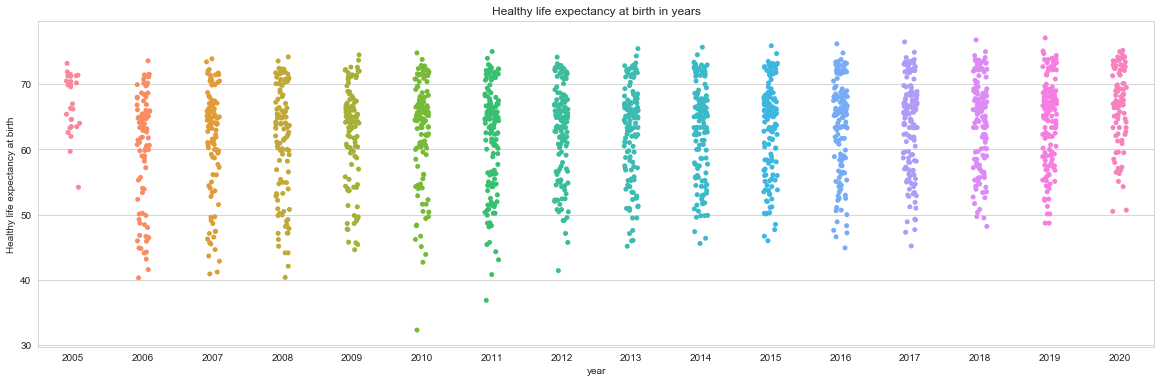

In [26]:
#Healthy life expectancy at birth
plt.figure(figsize=(20, 6))
sns.stripplot(x='year', y='Healthy life expectancy at birth', data=happiness).set(title='Healthy life expectancy at birth in years')
plt.show()

As shown earlier, Healthy life expectancy at birth increases in years, because of technical and science progress.

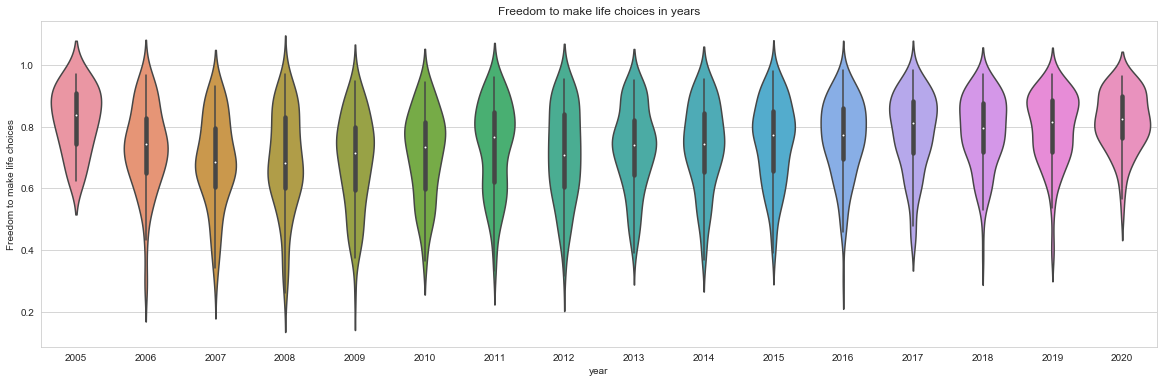

In [27]:
#Freedom to make life choices
plt.figure(figsize=(20, 6))
sns.violinplot(x='year', y='Freedom to make life choices', data=happiness).set(title='Freedom to make life choices in years')
plt.show()

As we saw earlier, last few years freedom to make life choices has been increasing. It relates with possibilities of free traveling between countries, freedom of getting education, find a job, start a family or relationship and many others.

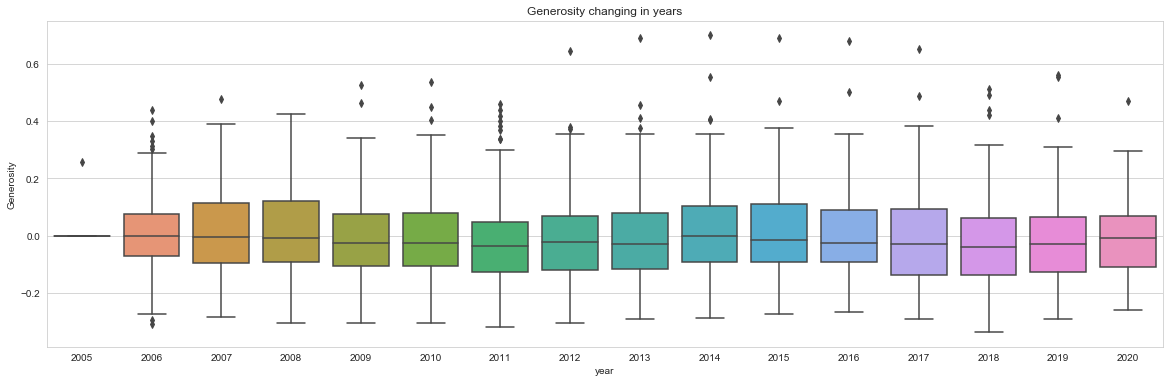

In [28]:
#generosity by years in a boxplot()
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='Generosity', data=happiness).set(title='Generosity changing in years')
plt.show()

Discover the top- and bottom-10 countries with Perceptions of corruption:

In [31]:
corruption_country_top10 = happiness.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).head(10)
corruption_country_top10

Country name
Romania                   0.953231
Bosnia and Herzegovina    0.944154
Bulgaria                  0.942000
Moldova                   0.933733
Ukraine                   0.932600
Indonesia                 0.931429
Croatia                   0.927923
Trinidad and Tobago       0.927000
Portugal                  0.921154
Lithuania                 0.918333
Name: Perceptions of corruption, dtype: float64

In [30]:
corruption_country_bottom10 = happiness.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).tail(10)
corruption_country_bottom10

Country name
Luxembourg                   0.377182
Hong Kong S.A.R. of China    0.348818
Norway                       0.344200
Switzerland                  0.305900
Sweden                       0.295008
New Zealand                  0.266214
Finland                      0.249000
Denmark                      0.200467
Rwanda                       0.186000
Singapore                    0.147779
Name: Perceptions of corruption, dtype: float64

In general, the most corrupt countries are Romania, Bosnia and Herzegovina and Bulgaria. And the least corrupt countries is Singapore, Rwanda and Denmark. It can be easy explain by life quality in this countries and trust to the government.

Next step will be good practice to compare some features of some countries (for example, Russia, China, USA, Sweden and India):

In [40]:
#add country of interest in a separate list
countries = happiness[(happiness['Country name'] == 'Russia')| (happiness['Country name'] == 'China') | (happiness['Country name'] == 'United States') | (happiness['Country name'] == 'Sweden') | (happiness['Country name'] == 'India')]


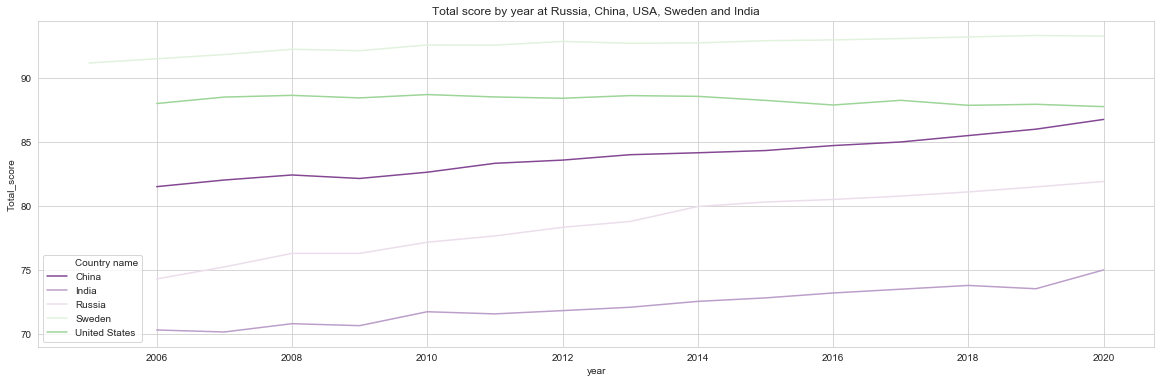

In [41]:
#create a lineplot with this countries grouped by total score and year
sns.set_style('whitegrid')
sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Total_score', data=countries, hue='Country name').set(title='Total score by year at Russia, China, USA, Sweden and India')
plt.show()

Unfortunately, total score of happiness in Russia the least, but it grow over the year.

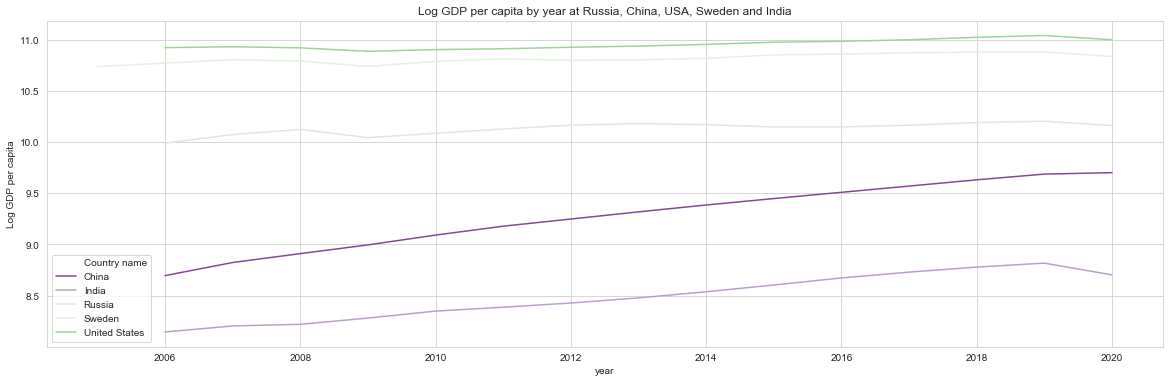

In [42]:
#log GDP per capita in years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Log GDP per capita', data=countries, hue='Country name').set(title='Log GDP per capita by year at Russia, China, USA, Sweden and India')
plt.show()

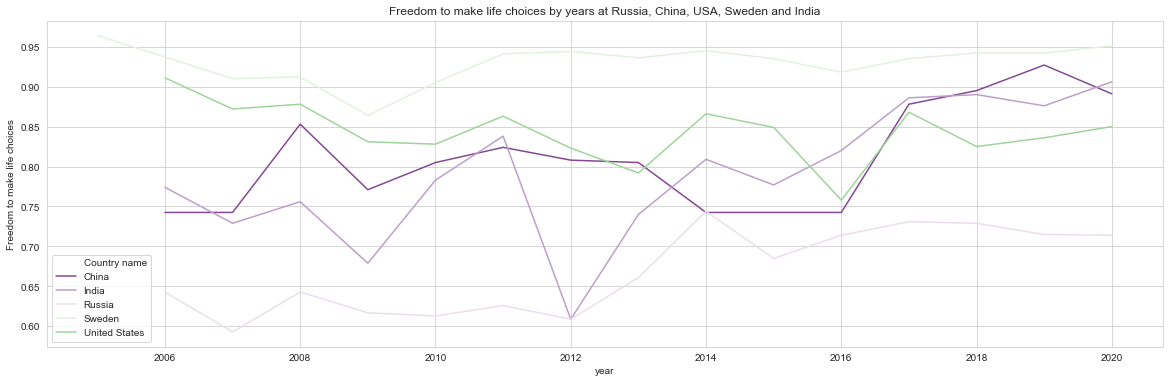

In [43]:
#Freedom to make life choices by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Freedom to make life choices', data=countries, hue='Country name').set(title='Freedom to make life choices by years at Russia, China, USA, Sweden and India')
plt.show()

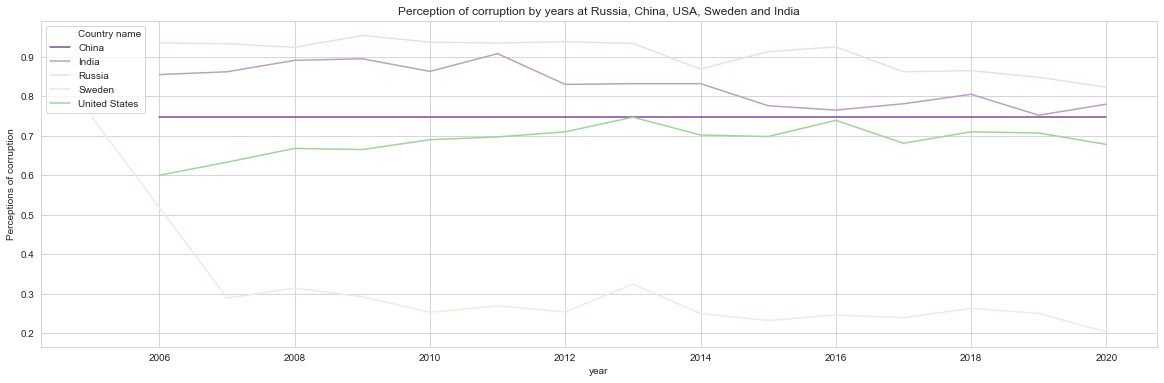

In [45]:
#perception of corruption by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Perceptions of corruption', data=countries, hue='Country name').set(title='Perception of corruption by years at Russia, China, USA, Sweden and India')
plt.show()

The highest perseptions of corruption is in Russia and Sweden since 2007 has been demonstrating very low degree of corruption.

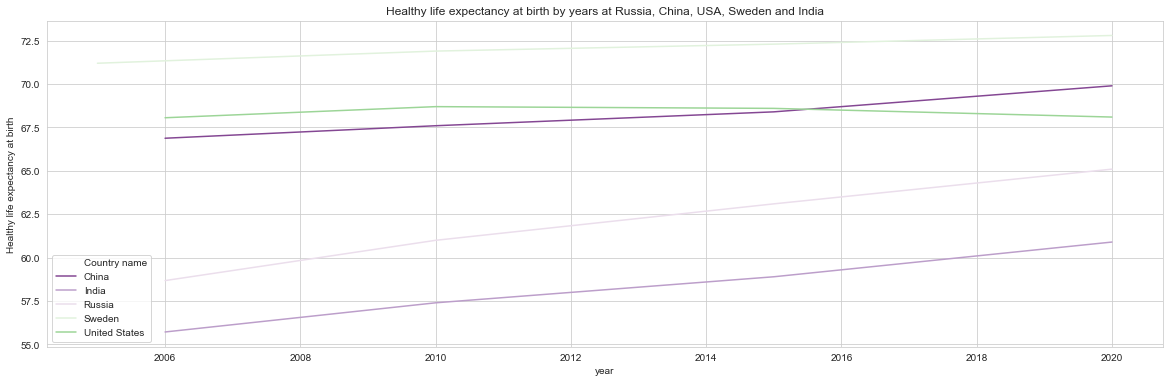

In [46]:
#Healthy life expectancy at birth by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Healthy life expectancy at birth', data=countries, hue='Country name').set(title='Healthy life expectancy at birth by years at Russia, China, USA, Sweden and India')
plt.show()

The best Healthy life expectancy at birth during all period has Sweden and its growing up.